In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [4]:
# Reading Data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [6]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

n = len(X)

numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)
print(b1, b0)

0.26342933948939945 325.57342104944223


In [7]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

In [8]:
x

array([2620.        , 2622.22922923, 2624.45845846, 2626.68768769,
       2628.91691692, 2631.14614615, 2633.37537538, 2635.6046046 ,
       2637.83383383, 2640.06306306, 2642.29229229, 2644.52152152,
       2646.75075075, 2648.97997998, 2651.20920921, 2653.43843844,
       2655.66766767, 2657.8968969 , 2660.12612613, 2662.35535536,
       2664.58458458, 2666.81381381, 2669.04304304, 2671.27227227,
       2673.5015015 , 2675.73073073, 2677.95995996, 2680.18918919,
       2682.41841842, 2684.64764765, 2686.87687688, 2689.10610611,
       2691.33533534, 2693.56456456, 2695.79379379, 2698.02302302,
       2700.25225225, 2702.48148148, 2704.71071071, 2706.93993994,
       2709.16916917, 2711.3983984 , 2713.62762763, 2715.85685686,
       2718.08608609, 2720.31531532, 2722.54454454, 2724.77377377,
       2727.003003  , 2729.23223223, 2731.46146146, 2733.69069069,
       2735.91991992, 2738.14914915, 2740.37837838, 2742.60760761,
       2744.83683684, 2747.06606607, 2749.2952953 , 2751.52452

In [9]:
y

array([1015.75829051, 1016.3455349 , 1016.93277928, 1017.52002366,
       1018.10726805, 1018.69451243, 1019.28175681, 1019.8690012 ,
       1020.45624558, 1021.04348996, 1021.63073435, 1022.21797873,
       1022.80522311, 1023.3924675 , 1023.97971188, 1024.56695626,
       1025.15420065, 1025.74144503, 1026.32868941, 1026.9159338 ,
       1027.50317818, 1028.09042256, 1028.67766695, 1029.26491133,
       1029.85215571, 1030.4394001 , 1031.02664448, 1031.61388886,
       1032.20113325, 1032.78837763, 1033.37562201, 1033.9628664 ,
       1034.55011078, 1035.13735516, 1035.72459955, 1036.31184393,
       1036.89908832, 1037.4863327 , 1038.07357708, 1038.66082147,
       1039.24806585, 1039.83531023, 1040.42255462, 1041.009799  ,
       1041.59704338, 1042.18428777, 1042.77153215, 1043.35877653,
       1043.94602092, 1044.5332653 , 1045.12050968, 1045.70775407,
       1046.29499845, 1046.88224283, 1047.46948722, 1048.0567316 ,
       1048.64397598, 1049.23122037, 1049.81846475, 1050.40570

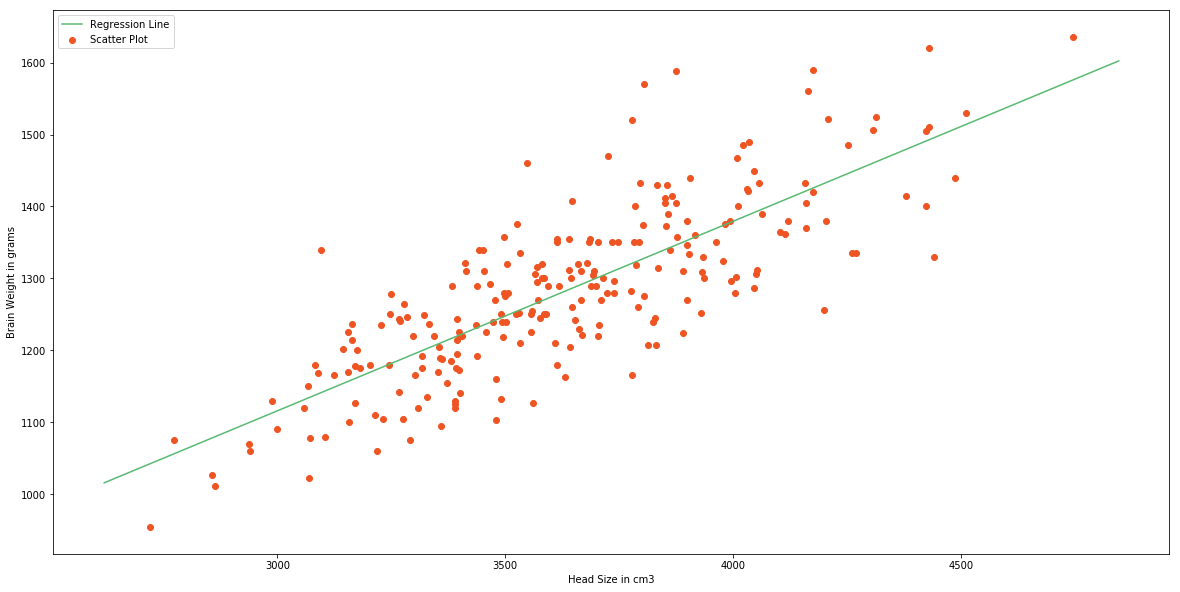

In [5]:
plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

This model is not so bad. But we need to find how good is our model. 
There are many methods to evaluate models. 
We will use Root Mean Squared Error and Coefficient of Determination(R<sup>2</sup> Score).

In [9]:
rmse = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print(rmse)

72.1206213784


In [23]:
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print(r2)

0.639311719957


In [10]:
# Validation using Scikit Learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [11]:
X

array([4512, 3738, 4261, 3777, 4177, 3585, 3785, 3559, 3613, 3982, 3443,
       3993, 3640, 4208, 3832, 3876, 3497, 3466, 3095, 4424, 3878, 4046,
       3804, 3710, 4747, 4423, 4036, 4022, 3454, 4175, 3787, 3796, 4103,
       4161, 4158, 3814, 3527, 3748, 3334, 3492, 3962, 3505, 4315, 3804,
       3863, 4034, 4308, 3165, 3641, 3644, 3891, 3793, 4270, 4063, 4012,
       3458, 3890, 4166, 3935, 3669, 3866, 3393, 4442, 4253, 3727, 3329,
       3415, 3372, 4430, 4381, 4008, 3858, 4121, 4057, 3824, 3394, 3558,
       3362, 3930, 3835, 3830, 3856, 3249, 3577, 3933, 3850, 3309, 3406,
       3506, 3907, 4160, 3318, 3662, 3899, 3700, 3779, 3473, 3490, 3654,
       3478, 3495, 3834, 3876, 3661, 3618, 3648, 4032, 3399, 3916, 4430,
       3695, 3524, 3571, 3594, 3383, 3499, 3589, 3900, 4114, 3937, 3399,
       4200, 4488, 3614, 4051, 3782, 3391, 3124, 4053, 3582, 3666, 3532,
       4046, 3667, 2857, 3436, 3791, 3302, 3104, 3171, 3572, 3530, 3175,
       3438, 3903, 3899, 3401, 3267, 3451, 3090, 34

In [14]:
# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((n, 1))
print(X.shape)
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)

(237, 1)


In [24]:
help(np.reshape)

Help on function reshape in module numpy:

reshape(a, newshape, order='C')
    Gives a new shape to an array without changing its data.
    
    Parameters
    ----------
    a : array_like
        Array to be reshaped.
    newshape : int or tuple of ints
        The new shape should be compatible with the original shape. If
        an integer, then the result will be a 1-D array of that length.
        One shape dimension can be -1. In this case, the value is
        inferred from the length of the array and remaining dimensions.
    order : {'C', 'F', 'A'}, optional
        Read the elements of `a` using this index order, and place the
        elements into the reshaped array using this index order.  'C'
        means to read / write the elements using C-like index order,
        with the last axis index changing fastest, back to the first
        axis index changing slowest. 'F' means to read / write the
        elements using Fortran-like index order, with the first index
        c

In [28]:
Y_pred = reg.predict(X)


rmse = mean_squared_error(Y, Y_pred)
r2_score = reg.score(X, Y)

In [29]:
print(np.sqrt(mse))
print(r2_score)

72.1206213784
0.639311719957
